# Bayer Data Scientist Internship

**To determine the outcome of the harvest season, i.e. whether the crop would be healthy (alive), damaged by pesticides, or damaged by other reasons.**

*ID: UniqueID*

*Estimated_Insects_Count: Estimated insects count per square meter*

*Crop_Type: Category of Crop(0,1)*

*Soil_Type: Category of Soil (0,1)*

*Pesticide_Use_Category: Type of pesticides uses (1- Never, 2-Previously Used, 3-Currently Using)*

*Number_Doses_Week: Number of doses per week* 

*Number_Weeks_Used: Number of weeks used*

*Number_Weeks_Quit: Number of weeks quit*

*Season: Season Category (1,2,3)*

*Crop_Damage: Crop Damage Category (0=alive, 1=Damage due to other causes, 2=Damage due to Pesticides)*

## 1. Exploratory Data Analysis

In [224]:
#Importing pandas library which will be used for loading the dataset, Data Analysis, and Data Manipulation
import pandas as pd

#Imported warnings to ignore certain warnings that might arise
import warnings
warnings.filterwarnings('ignore')

#Loading the dataset
df = pd.read_csv("D:\Harvest-Prediction-Model-1\Crop_Data.csv")
df = df[~df.index.duplicated(keep = 'first')]
df.drop(columns=["ID"], axis=1, inplace=True)

Text(0.5, 1.0, 'Corelation Matrix')

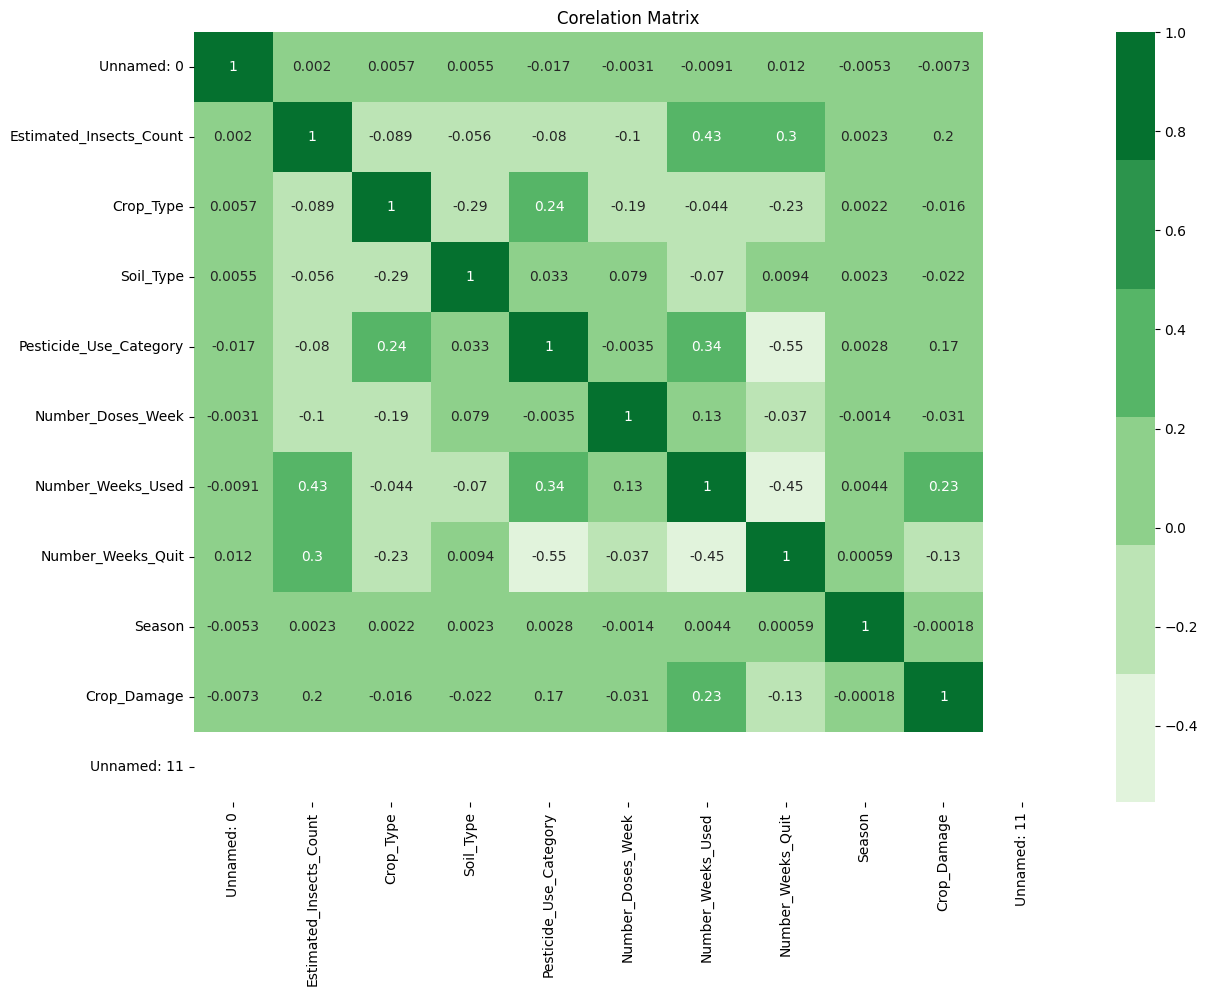

In [225]:
import matplotlib.pyplot as plt 
import seaborn as sns

df = df.apply(pd.to_numeric, errors='coerce')
plt.figure(figsize = (14,10))

colormap = sns.color_palette("Greens")

sns.heatmap(df.corr(), annot = True, cmap = colormap, cbar = True)

plt.title('Corelation Matrix')

1.Estimated_Insects_count,Pesticide_use_category and Number_weeks_used are positively correlated with Crop damage.

2.Number_weeks_used  is positively correlated with Estimated_Insects_count and Pesticide_use_category. 

3.Number_weeks_Quit is highly negatively correlated with Pesticide_use_category and Number_weeks_used.

## 2. Data Visualization

More Crops are alive than dead

array([[<Axes: title={'center': 'Estimated_Insects_Count'}>,
        <Axes: title={'center': 'Crop_Type'}>],
       [<Axes: title={'center': 'Soil_Type'}>,
        <Axes: title={'center': 'Pesticide_Use_Category'}>],
       [<Axes: title={'center': 'Number_Doses_Week'}>,
        <Axes: title={'center': 'Number_Weeks_Used'}>],
       [<Axes: title={'center': 'Number_Weeks_Quit'}>,
        <Axes: title={'center': 'Season'}>],
       [<Axes: title={'center': 'Crop_Damage'}>, <Axes: >],
       [<Axes: >, <Axes: >]], dtype=object)

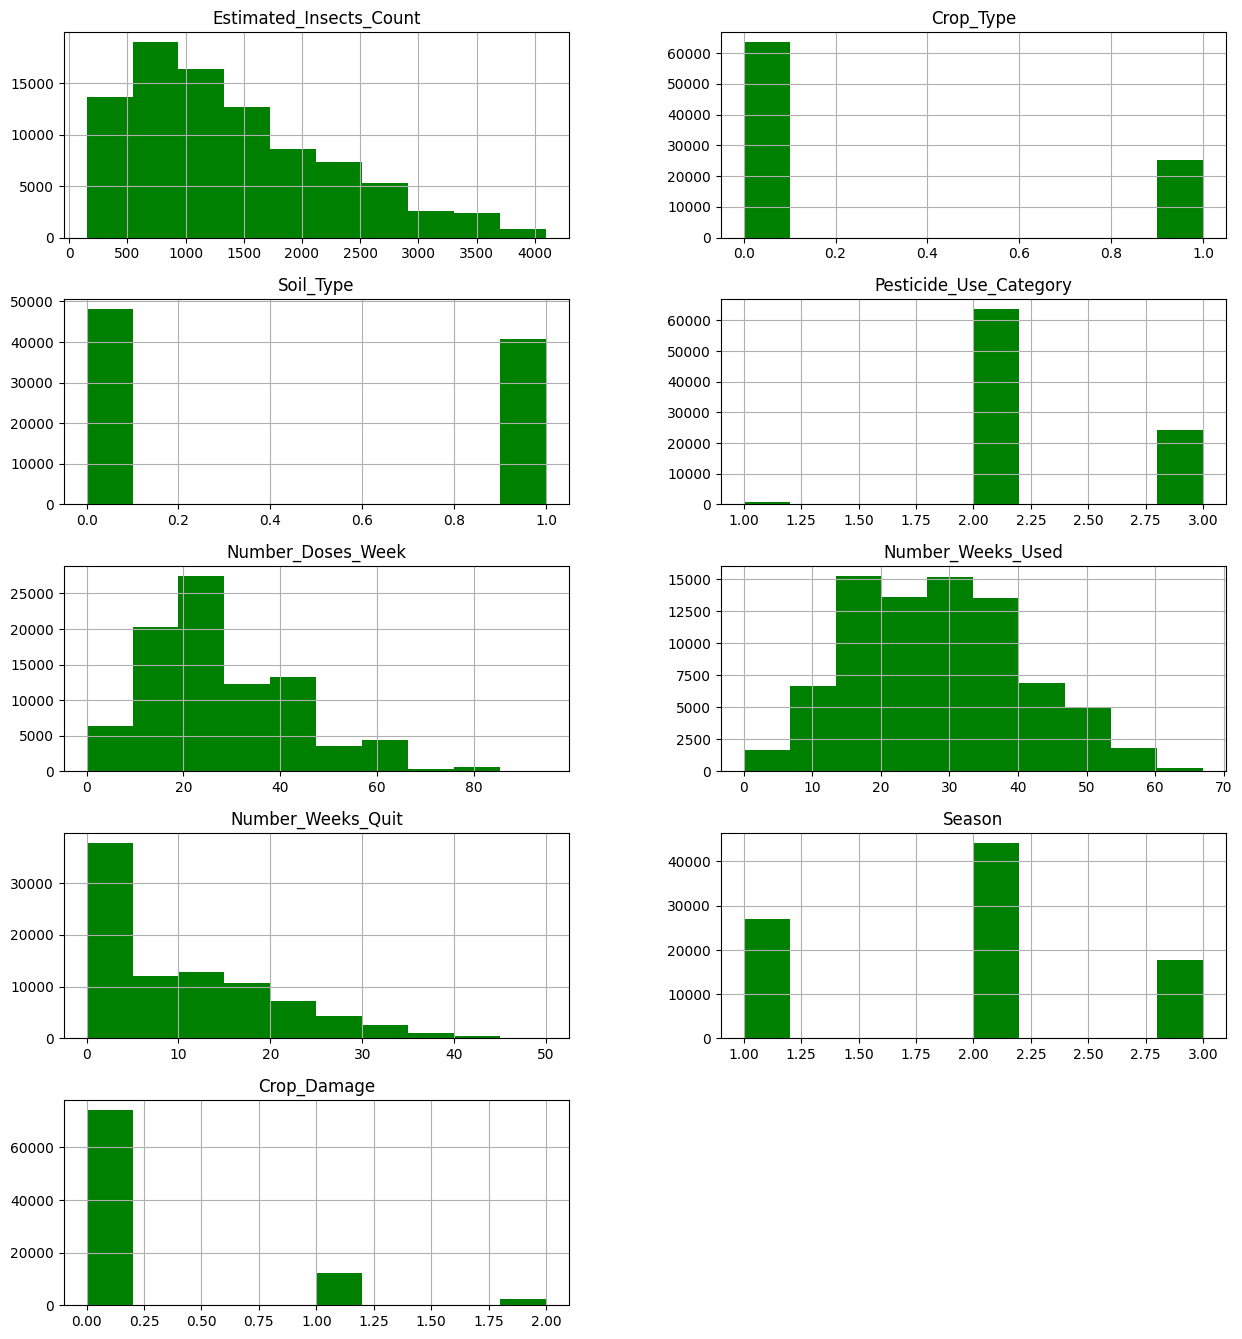

In [226]:
#Histogram of all the features
cols_to_plot = [col for col in df.columns if not col.startswith('Unnamed')]
df[cols_to_plot].hist(figsize=(15, 20), layout=(6, 2), bins=10, color='green')

1. Crop damage due to pesticides is very low. So, pesticides is recommended
2. Crop Type 0 will survive more than crop type 1
3. Soil Type is same as for 0 and 1(in the amounts)
4. Pesticide Category 2 is used more than 1 and 3 combined
5. 500 - 1000 sq meter has the highest insects count
6. Number_Weeks_Quit is positive skewed
7. Number_Weeks_Used is approximately normally distributed
8. Estimated Insects Count is right skewed

## 3. Data Cleaning and Feature Engineering

In [227]:
#Replacing missing values with the mean
df['Number_Weeks_Used'].fillna(df['Number_Weeks_Used'].mean(),inplace = True)

In [228]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88858 entries, 0 to 88857
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               88858 non-null  int64  
 1   Estimated_Insects_Count  88858 non-null  int64  
 2   Crop_Type                88858 non-null  int64  
 3   Soil_Type                88858 non-null  int64  
 4   Pesticide_Use_Category   88858 non-null  int64  
 5   Number_Doses_Week        88858 non-null  int64  
 6   Number_Weeks_Used        88858 non-null  float64
 7   Number_Weeks_Quit        88858 non-null  int64  
 8   Season                   88858 non-null  int64  
 9   Crop_Damage              88858 non-null  int64  
 10  Unnamed: 11              0 non-null      float64
dtypes: float64(2), int64(9)
memory usage: 7.5 MB


**All the missing values are removed**

In [229]:
df.drop(columns=["Unnamed: 0", "Unnamed: 11"], axis=1, inplace=True, errors='ignore')
df.head(10)

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,188,1,0,1,0,0.00000,0,1,0
1,209,1,0,1,0,0.00000,0,2,1
2,257,1,0,1,0,0.00000,0,2,1
3,257,1,1,1,0,0.00000,0,2,1
4,342,1,0,1,0,0.00000,0,2,1
5,448,0,1,1,0,28.62397,0,2,1
6,448,0,1,1,0,28.62397,0,2,1
7,577,1,0,1,0,0.00000,0,1,2
8,731,0,0,1,0,0.00000,0,2,0
9,1132,1,0,1,0,0.00000,0,1,2


Making features normally distrubuted

In [230]:
#Checking the skew of each feature
df.skew()

Estimated_Insects_Count    0.839146
Crop_Type                  0.955978
Soil_Type                  0.166914
Pesticide_Use_Category     0.779488
Number_Doses_Week          0.962879
Number_Weeks_Used          0.258007
Number_Weeks_Quit          0.892773
Season                     0.145228
Crop_Damage                2.367948
dtype: float64

As of now, Soil_Type, Number_Weeks_Used, Season are normally distributed

In [231]:
#Function to return plots for the feature
import scipy.stats as stats
import pylab

def normality(data,feature):
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    sns.kdeplot(data[feature])
    plt.subplot(1,2,2)
    stats.probplot(data[feature],plot=pylab)
    plt.show()

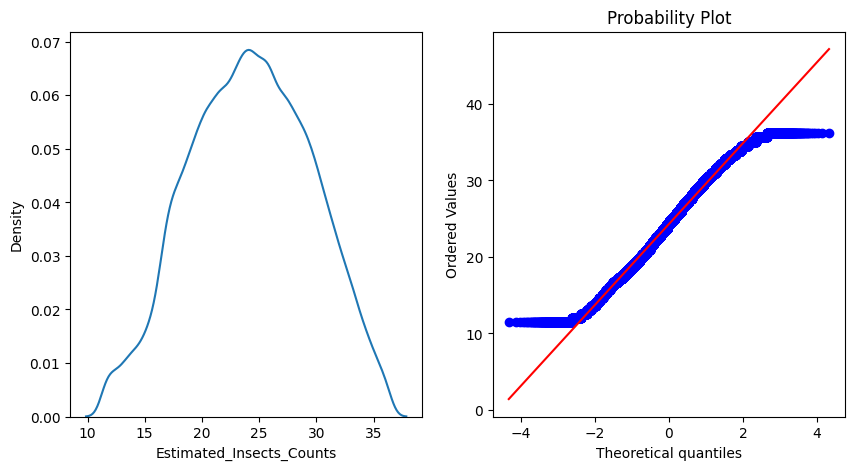

In [232]:
#Converting Estimated Insects Count feature to Normal Distribution using Box-Cox transform
#Plotting to check the transformation
df['Estimated_Insects_Counts'], parameters = stats.boxcox(df['Estimated_Insects_Count'])
normality(df,'Estimated_Insects_Counts')

In [233]:
df[df.index.duplicated()]

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage,Estimated_Insects_Counts


In [234]:
import numpy as np
df.loc[df['Number_Weeks_Used']>55,'Number_Weeks_Used'] = np.mean(df["Number_Weeks_Used"])

In [235]:
df.loc[df['Estimated_Insects_Count']>3500,'Estimated_Insects_Count'] = np.mean(df["Estimated_Insects_Count"])

In [236]:
df.loc[df['Number_Weeks_Quit']>40,'Number_Weeks_Quit'] = np.mean(df["Number_Weeks_Quit"])

In [237]:
df.loc[df['Number_Doses_Week']>80,'Number_Doses_Week'] = np.mean(df["Number_Doses_Week"])

In [238]:
df.drop(columns = ["Estimated_Insects_Count"], axis = 1, inplace = True)

## 4. Feature Scaling, Modelling and Evaluation

In [239]:
#Creating predictors and Target
y = df['Crop_Damage']
X = df.drop(columns = ['Crop_Damage'])

#Performing Train Test split using sklearn library
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.65, random_state = 0)

In [240]:
#Verifying shapes of our test train split
print("X_train shape is ", X_train.shape)
print("X_test shape is ", X_test.shape)
print("y_train shape is ", y_train.shape)
print("y_test shape is ", y_test.shape)

X_train shape is  (57757, 8)
X_test shape is  (31101, 8)
y_train shape is  (57757,)
y_test shape is  (31101,)


In [241]:
#We do encoding for nominal data so I used get_dummies method
X_train = pd.get_dummies(data = X_train, columns = ["Season","Pesticide_Use_Category","Soil_Type","Crop_Type"])
X_train.head(10)

,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Estimated_Insects_Counts,Season_1,Season_2,Season_3,Pesticide_Use_Category_1,Pesticide_Use_Category_2,Pesticide_Use_Category_3,Soil_Type_0,Soil_Type_1,Crop_Type_0,Crop_Type_1
56069,20.0,36.00000,0.0,19.871189,False,False,True,False,False,True,True,False,True,False
49232,20.0,38.00000,3.0,22.047215,False,True,False,False,True,False,True,False,True,False
75787,40.0,23.00000,39.0,35.644628,True,False,False,False,True,False,False,True,True,False
20300,20.0,30.00000,18.0,35.059251,False,False,True,False,True,False,True,False,False,True
55416,10.0,42.00000,8.0,29.300112,True,False,False,False,True,False,False,True,True,False
48927,55.0,28.62397,0.0,25.356176,False,False,True,False,False,True,True,False,False,True
41837,20.0,32.00000,17.0,25.914134,False,False,True,False,True,False,True,False,True,False
80645,5.0,10.00000,37.0,29.295591,True,False,False,False,True,False,False,True,True,False
50713,5.0,18.00000,20.0,23.140157,True,False,False,False,True,False,True,False,False,True
1017,80.0,41.00000,4.0,24.796937,False,True,False,False,True,False,True,False,True,False


In [242]:
#Let us normalize values for features(Number_Doses_Week,	Number_Weeks_Used,	Number_Weeks_Quit,	Estimated_Insects_Counts)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)

In [243]:
#Checking normalized values by creating a dataframe
from pandas import DataFrame
X_train_df = DataFrame(X_train)
X_train_df.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.2500,0.654545,0.000,0.338342,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
1,0.2500,0.690909,0.075,0.426356,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,0.5000,0.418182,0.975,0.976329,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
3,0.2500,0.545455,0.450,0.952652,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,0.1250,0.763636,0.200,0.719713,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
5,0.6875,0.520436,0.000,0.560193,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
6,0.2500,0.581818,0.425,0.582760,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
7,0.0625,0.181818,0.925,0.719530,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
8,0.0625,0.327273,0.500,0.470562,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
9,1.0000,0.745455,0.100,0.537573,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [244]:
#Performed feature encoding to the X_test feature using get_dummies and then transformed
X_test = pd.get_dummies(data = X_test, columns=["Season","Pesticide_Use_Category","Soil_Type","Crop_Type"])
X_test = scaler.transform(X_test)

In [245]:
#Creating a dataframe from normalized values of test dataset
X_test_df = DataFrame(X_test)
X_test_df.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.2500,0.454545,0.650,0.788818,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
1,0.1875,0.345455,0.425,0.448380,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,0.1250,0.520436,0.900,0.905624,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
3,0.1250,0.581818,0.225,0.492849,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,0.4375,0.520436,0.000,0.492849,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
5,0.0625,0.454545,0.000,0.359942,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
6,0.2500,0.381818,0.100,0.208645,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
7,0.7500,0.527273,0.000,0.404199,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
8,0.3750,0.854545,0.000,0.470562,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
9,0.3125,0.581818,0.075,0.294901,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0


## 4.2.Artificial Neural Network

In [246]:
#Train Test Split
X_train_net, X_test_net, y_train_net, y_test_net = train_test_split(X, y, train_size=0.65, random_state = 0)

In [247]:
#Verifying shapes of our test train split
print("X_train_net shape is ", X_train_net.shape)
print("X_test_net shape is ", X_test_net.shape)
print("y_train_net shape is ", y_train_net.shape)
print("y_test_net shape is ", y_test_net.shape)

X_train_net shape is  (57757, 8)
X_test_net shape is  (31101, 8)
y_train_net shape is  (57757,)
y_test_net shape is  (31101,)


In [248]:
#We do encoding for nominal data so I used get_dummies method
X_train_net = pd.get_dummies(data = X_train_net, columns = ["Season","Pesticide_Use_Category","Soil_Type","Crop_Type"])
X_train_net.head(10)

,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Estimated_Insects_Counts,Season_1,Season_2,Season_3,Pesticide_Use_Category_1,Pesticide_Use_Category_2,Pesticide_Use_Category_3,Soil_Type_0,Soil_Type_1,Crop_Type_0,Crop_Type_1
56069,20.0,36.00000,0.0,19.871189,False,False,True,False,False,True,True,False,True,False
49232,20.0,38.00000,3.0,22.047215,False,True,False,False,True,False,True,False,True,False
75787,40.0,23.00000,39.0,35.644628,True,False,False,False,True,False,False,True,True,False
20300,20.0,30.00000,18.0,35.059251,False,False,True,False,True,False,True,False,False,True
55416,10.0,42.00000,8.0,29.300112,True,False,False,False,True,False,False,True,True,False
48927,55.0,28.62397,0.0,25.356176,False,False,True,False,False,True,True,False,False,True
41837,20.0,32.00000,17.0,25.914134,False,False,True,False,True,False,True,False,True,False
80645,5.0,10.00000,37.0,29.295591,True,False,False,False,True,False,False,True,True,False
50713,5.0,18.00000,20.0,23.140157,True,False,False,False,True,False,True,False,False,True
1017,80.0,41.00000,4.0,24.796937,False,True,False,False,True,False,True,False,True,False


In [249]:
#Importing libraries for Neural Nets
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Input, Embedding, Flatten, Dense, Concatenate
from keras.models import Model
import tensorflow as tf

In [250]:
from keras.layers import Dropout
from keras.callbacks import EarlyStopping

model = Sequential()
model.add(Dense(24, input_dim=X_train_net.shape[1], activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.3))
model.add(Dense(48, activation='relu', kernel_initializer='glorot_uniform'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(128, activation='relu', kernel_initializer='glorot_uniform'))
model.add(Dense(96, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(64, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(3, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

model.fit(X_train_net, y_train_net, epochs=50, batch_size=16, validation_split=0.2, callbacks=[early_stop])

Epoch 1/50
2888/2888 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.8244 - loss: 0.6095 - val_accuracy: 0.8388 - val_loss: 0.4930
Epoch 2/50
2888/2888 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8372 - loss: 0.4966 - val_accuracy: 0.8399 - val_loss: 0.4678
Epoch 3/50
2888/2888 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8384 - loss: 0.4769 - val_accuracy: 0.8392 - val_loss: 0.4672
Epoch 4/50
2888/2888 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8368 - loss: 0.4712 - val_accuracy: 0.8373 - val_loss: 0.4603
Epoch 5/50
2888/2888 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8340 - loss: 0.4670 - val_accuracy: 0.8369 - val_loss: 0.4597
Epoch 6/50
2888/2888 ━━━━━━━━━━━━━━━━━━━━ 3s 1000us/step - accuracy: 0.8367 - loss: 0.4583 - val_accuracy: 0.8391 - val_loss: 0.4516
Epoch 7/50
2888/2888 ━━━━━━━━━━━━━━━━━━━━ 3s 871us/step - accuracy: 0.8377 - loss: 0.4537 - val_accuracy: 0.8392 - val_loss: 0.4515
Epoch 8/50
2888/2888 ━━━━━━━━━━━━━━━━━━━━ 3s 896us/step - accuracy: 0.8373 - loss: 0.

In [251]:
#Evaluate the keras model
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

972/972 ━━━━━━━━━━━━━━━━━━━━ 1s 739us/step - accuracy: 0.8360 - loss: 0.8714
Accuracy: 83.61


In [252]:
#Make probability predictions with the model
predictions = model.predict(X_test)
rounded = [round(x[0]) for x in predictions]
print(rounded)

972/972 ━━━━━━━━━━━━━━━━━━━━ 1s 677us/step
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [253]:
# Save the ANN model to an HDF5 file
model.save("harvestcrop.h5")
